# Pandas基本操作

## Pythonのバージョン確認、モジュールのimport、データの読み込み

In [62]:
!python -V

Python 3.7.0


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib


In [64]:
df = pd.read_csv('./data/lunch_box.csv', sep=',')

In [65]:
df.head(3)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5


In [66]:
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [67]:
df.tail()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


## 簡単にデータの状態を確認する

In [68]:
print('dataframeの行数・列数の確認==>\n', df.shape)
print('indexの確認==>\n', df.index)
print('columnの確認==>\n', df.columns)
print('dataframeの各列のデータ型を確認==>\n', df.dtypes)

dataframeの行数・列数の確認==>
 (207, 12)
indexの確認==>
 RangeIndex(start=0, stop=207, step=1)
columnの確認==>
 Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')
dataframeの各列のデータ型を確認==>
 datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object


In [69]:
df[['name','kcal']]

,name,kcal
0,厚切りイカフライ,NaN
1,手作りヒレカツ,NaN
2,白身魚唐揚げ野菜あん,NaN
3,若鶏ピリ辛焼,NaN
4,ビッグメンチカツ,NaN
...,...,...
202,白身魚のマスタード焼き,408.0
203,牛カルビ焼き肉,394.0
204,ランチビュッフェ,NaN
205,豚肉と玉子の炒め,404.0


In [70]:
df[100:106]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
100,2014-4-22,78,火,1,マーボ豆腐,382.0,NaN,NaN,NaN,曇,--,18.8
101,2014-4-23,63,水,0,手作りひれかつ,340.0,NaN,NaN,NaN,快晴,--,19.4
102,2014-4-24,56,木,1,鶏の照り焼きマヨ,360.0,NaN,NaN,NaN,晴れ,--,19.9
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.8
104,2014-4-28,54,月,0,タンドリーチキン,342.0,NaN,NaN,NaN,晴れ,--,22.7
105,2014-4-30,97,水,1,豚味噌メンチカツ,368.0,NaN,NaN,NaN,雨,0.5,17.5


In [71]:
df.loc[100]

datetime         2014-4-22
y                       78
week                     火
soldout                  1
name                 マーボ豆腐
kcal                   382
remarks                NaN
event                  NaN
payday                 NaN
weather                  曇
precipitation           --
temperature           18.8
Name: 100, dtype: object

In [72]:
df.iloc[[1,2,4],[0,2]]

,datetime,week
1,2013-11-19,火
2,2013-11-20,水
4,2013-11-22,金


In [73]:
df[['name','kcal']].query('kcal > 450 and name == "豚肉の生姜焼"')

,name,kcal
29,豚肉の生姜焼,462.0


In [74]:
df['remarks'].unique()

array([nan, '鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー',
       '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）'], dtype=object)

In [75]:
len(df) == len(df['datetime'].unique())

True

In [76]:
df.drop_duplicates()
df.shape

(207, 12)

In [77]:
df.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


## データの整形

In [78]:
df.set_index('datetime', inplace=True)
df.head()

,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [79]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [80]:
df.rename(columns={'y':'sales'}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [81]:
df.sort_values(by="sales", ascending=True).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
2014-8-1,38,金,0,豚肉の生姜焼き,380.0,NaN,NaN,NaN,薄曇,--,32.7
2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,NaN,NaN,曇,0,25.1
2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4


In [82]:
df.sort_values(['sales', 'temperature'], ascending=False).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8
2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
2013-12-11,157,水,0,五目御飯,NaN,NaN,NaN,NaN,曇,--,11.0
2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1


In [83]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [84]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [85]:
df.index

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27',
               '2013-11-28', '2013-11-29',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-22', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name='datetime', length=207, freq=None)

In [86]:
df.sort_index().head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [87]:
df.resample('M').mean()

,sales,soldout,kcal,payday,temperature
datetime,,,,,
2013-11-30,124.600000,0.500000,NaN,NaN,16.060000
2013-12-31,139.722222,0.444444,NaN,1.0,10.844444
2014-01-31,115.222222,0.611111,427.555556,1.0,8.716667
2014-02-28,107.842105,0.526316,420.947368,1.0,7.815789
2014-03-31,89.350000,0.450000,382.157895,1.0,12.505000
2014-04-30,85.761905,0.476190,360.000000,1.0,18.176190
2014-05-31,74.200000,0.550000,419.111111,1.0,22.505000
2014-06-30,67.285714,0.333333,423.315789,1.0,25.409524
2014-07-31,61.363636,0.454545,397.200000,1.0,29.350000


In [88]:
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
df['day'] = list(pd.Series(df.index).apply(lambda x: x.day))

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day
datetime,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22


In [89]:
labels = ['上旬', '中旬', '下旬']
df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels, right=True) # 0<day≦10, 10<day≦20, 20<day≦31

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## データの欠損状態の確認

In [90]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [91]:
print(df[df.isnull().any(axis=1)].shape)
df[df.isnull().any(axis=1)].head()

(207, 14)


,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## 値(欠損)の置き換えや削除

In [92]:
df.fillna(value={'payday': 0.0},inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,11,22,下旬


In [93]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [94]:
df.dropna(subset=['kcal'], axis=0, inplace=True)
df.shape

(166, 14)

In [95]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal               0
remarks          158
event            155
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [96]:
df['precipitation'] = df['precipitation'].str.replace('--', '0').astype(float)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [97]:
pd.DataFrame(df['sales'].mask(df['sales'] > 80, 100)).head()

,sales
datetime,
2014-01-07,100
2014-01-08,100
2014-01-09,100
2014-01-10,100
2014-01-14,100


In [98]:
df.drop(['remarks'], axis=1, inplace=True)
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


## 集計

In [99]:
df['weather'].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雷電     1
雪      1
Name: weather, dtype: int64

In [100]:
df.groupby(['week'])['soldout'].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [101]:
df.groupby(['month', 'period'])['sales'].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [102]:
df.groupby(['weather'])['temperature'].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

In [103]:
df['temperature_diff'] = df['temperature'].diff(periods=1)
df[['temperature', 'temperature_diff']].head()

,temperature,temperature_diff
datetime,,
2014-01-07,7.3,NaN
2014-01-08,9.8,2.5
2014-01-09,10.9,1.1
2014-01-10,5.1,-5.8
2014-01-14,5.8,0.7


In [104]:
df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

,temperature,temperature_diff,temperature_rolling_mean
datetime,,,
2014-01-07,7.3,NaN,NaN
2014-01-08,9.8,2.5,NaN
2014-01-09,10.9,1.1,9.333333
2014-01-10,5.1,-5.8,8.600000
2014-01-14,5.8,0.7,7.266667


In [105]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

,temperature,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,
2014-01-07,7.3,NaN,NaN,NaN
2014-01-08,9.8,2.5,NaN,0.342466
2014-01-09,10.9,1.1,9.333333,0.112245
2014-01-10,5.1,-5.8,8.600000,-0.532110
2014-01-14,5.8,0.7,7.266667,0.137255


In [106]:
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [107]:
df.isnull().sum()

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

In [108]:
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


## 可視化

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

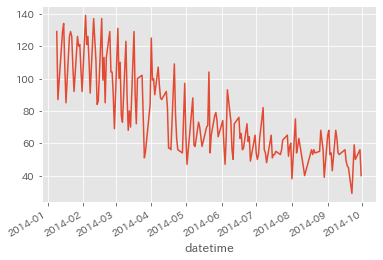

In [110]:
df['sales'].plot()

Text(0.5, 1.0, '気温変化に関する図')

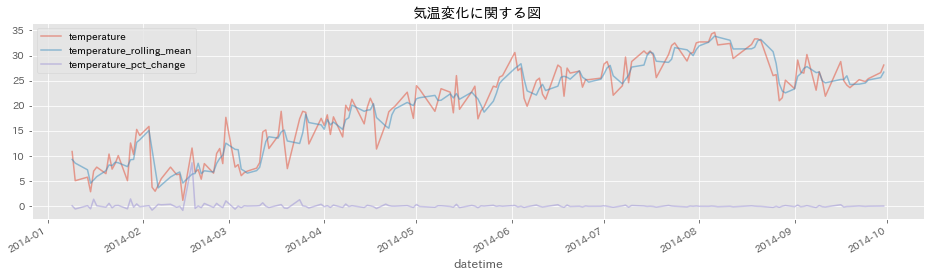

In [111]:
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5)
plt.title('気温変化に関する図')

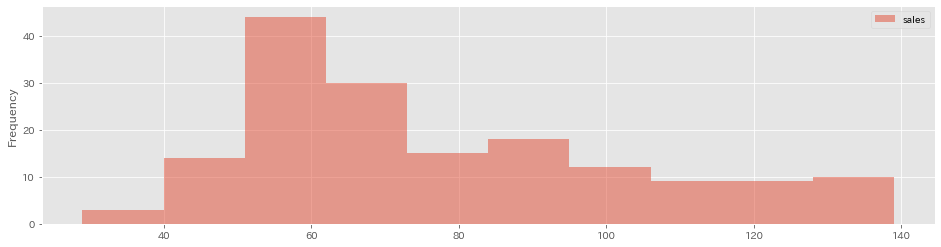

In [112]:
df.plot(kind='hist', y='sales', bins=10, figsize=(16,4), alpha=0.5)

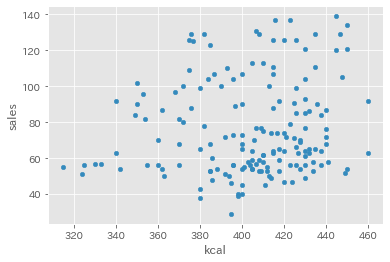

In [113]:
df.plot(kind='scatter', x='kcal', y='sales')

In [114]:
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [115]:
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,中旬,下旬
month,,,
1,216,581,1018
2,725,715,609
3,614,698,369
4,792,344,457
5,316,406,517
6,467,440,311
7,460,277,406
8,288,250,334
9,468,249,234


Text(0.5, 1.0, '月別・期間別の売上個数')

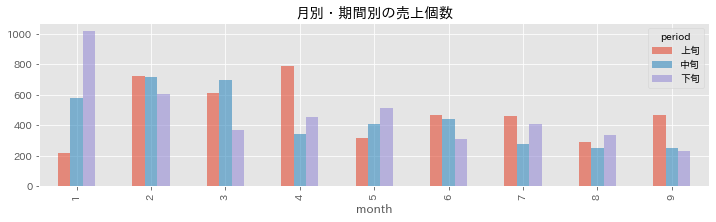

In [116]:
pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3))
plt.title('月別・期間別の売上個数')

## 変数の前処理

In [117]:
print(df.columns)
len(df.columns)

Index(['sales', 'week', 'soldout', 'name', 'kcal', 'event', 'payday',
       'weather', 'precipitation', 'temperature', 'month', 'day', 'period',
       'temperature_diff', 'temperature_rolling_mean',
       'temperature_pct_change'],
      dtype='object')


16

In [118]:
dummy_df = pd.get_dummies(df, columns=['week', 'name', 'event', 'weather', 'period'])
dummy_df.head()

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [119]:
pd.set_option('display.max_columns', 160)

In [120]:
print(dummy_df.shape)
dummy_df.head()

(164, 157)


,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 最後に、出来たデータをもう一度眺める

In [121]:
print(dummy_df.isnull().sum())
dummy_df.head()

sales            0
soldout          0
kcal             0
payday           0
precipitation    0
                ..
weather_雪        0
weather_雷電       0
period_上旬        0
period_中旬        0
period_下旬        0
Length: 157, dtype: int64


,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 参照

- [データ分析で頻出のPandas基本操作
](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)